In [2]:
cd drive/

/content/drive


In [3]:
cd My\ Drive

/content/drive/My Drive


In [4]:
cd Deep\ Learning

/content/drive/My Drive/Deep Learning


In [5]:
cd Artificial\ Neural\ Networks

/content/drive/My Drive/Deep Learning/Artificial Neural Networks


In [7]:
# Artificial Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# pip install tensorflow

# Installing Keras
# pip install --upgrade keras

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

# Encoding categorical data
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder_X_1 = LabelEncoder()
#X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
#labelencoder_X_2 = LabelEncoder()
#X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
#onehotencoder = ColumnTransformer([('one_hot_encoder', OneHotEncoder(),[1])], remainder = 'passthrough')
#X = onehotencoder.fit_transform(X)
#X = X[:, 1:]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X_2 = LabelEncoder()

X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

#onehotencoder = OneHotEncoder(categorical_features = [1])

#X = onehotencoder.fit_transform(X).toarray()

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')

X = np.array(columnTransformer.fit_transform(X), dtype = np.str)

X = X[:, 1:]





# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Epoch 1/100
800/800 [==============================] - 1s 897us/step - loss: 0.4883 - accuracy: 0.7955
Epoch 2/100
800/800 [==============================] - 1s 907us/step - loss: 0.4270 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 1s 941us/step - loss: 0.4213 - accuracy: 0.7987
Epoch 4/100
800/800 [==============================] - 1s 918us/step - loss: 0.4169 - accuracy: 0.8253
Epoch 5/100
800/800 [==============================] - 1s 924us/step - loss: 0.4146 - accuracy: 0.8309
Epoch 6/100
800/800 [==============================] - 1s 949us/step - loss: 0.4132 - accuracy: 0.8305
Epoch 7/100
800/800 [==============================] - 1s 994us/step - loss: 0.4116 - accuracy: 0.8339
Epoch 8/100
800/800 [==============================] - 1s 966us/step - loss: 0.4106 - accuracy: 0.8329
Epoch 9/100
800/800 [==============================] - 1s 934us/step - loss: 0.4094 - accuracy: 0.8345
Epoch 10/100
800/800 [==============================] - 1s 963us/step - l

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Test Data Accuracy: 0.8605


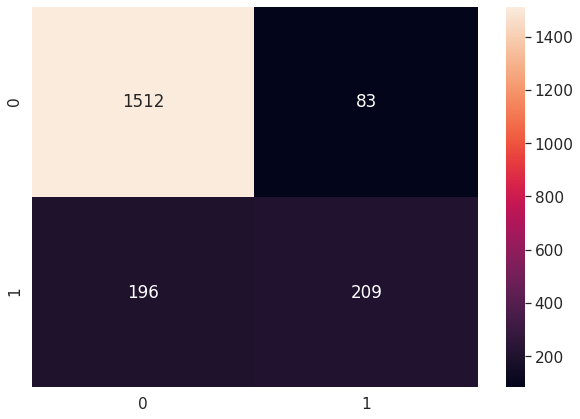

In [10]:
# Making the Confusion Matrix
import seaborn as sn
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))